In [ ]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr

from sklearn.metrics import pairwise_distances
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from collections import defaultdict

from sklearn.manifold import MDS

import plotly.graph_objs as go

In [ ]:
file_path = "/content/Aman Bhansali Data.xlsx - Sheet1 (1).csv"
df = pd.read_csv(file_path)

In [ ]:
df.drop(df.columns[-1], axis=1, inplace=True)

In [ ]:
df[['Material1', 'Material2']] = df['Material'].str.extract(r'\(([^,]+),\s*([^)]+)\)')
df['SimilarityScores'] = df['SimilarityScores'].astype(int)

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(df)

     Material  SimilarityScores Material1 Material2
0    (G3, M3)                 5        G3        M3
1    (W2, M1)                 4        W2        M1
2    (M2, S3)                 7        M2        S3
3    (G3, G2)                 8        G3        G2
4    (G3, S2)                 5        G3        S2
5    (S2, G2)                 4        S2        G2
6    (G2, W2)                 7        G2        W2
7    (S2, M1)                 7        S2        M1
8    (G3, W1)                 6        G3        W1
9    (M3, G1)                 4        M3        G1
10   (S3, G1)                 9        S3        G1
11   (G1, W3)                 3        G1        W3
12   (S3, M2)                 6        S3        M2
13   (M1, W2)                 5        M1        W2
14   (S3, W3)                 2        S3        W3
15   (G2, S3)                 3        G2        S3
16   (G1, W2)                 2        G1        W2
17   (M3, G2)                 9        M3        G2
18   (S1, W2

In [ ]:


# Extracting unique materials
materials = pd.concat([df['Material1'], df['Material2']]).unique()

# Constructing dissimilarity matrix
dissimilarity_matrix = pd.DataFrame(index=materials, columns=materials)

for index, row in df.iterrows():
    material1 = row['Material1']
    material2 = row['Material2']
    similarity_score = row['SimilarityScores']

    dissimilarity = 1 - similarity_score / 9.0 # Convert similarity score to dissimilarity

    dissimilarity_matrix.loc[material1, material2] = dissimilarity
    dissimilarity_matrix.loc[material2, material1] = dissimilarity

# Fill diagonal with zeros
np.fill_diagonal(dissimilarity_matrix.values, 0)


print("Dissimilarity Matrix:")
dissimilarity_matrix


Dissimilarity Matrix:


,G3,W2,M2,S2,G2,M3,S3,G1,M1,S1,W1,W3
G3,0,0.333333,0.888889,0.555556,0.777778,0.666667,0.888889,0.888889,0.777778,0.555556,0.777778,0.666667
W2,0.333333,0,0.888889,0.777778,0.111111,0.333333,0.888889,0.555556,0.444444,0.888889,0.666667,0.333333
M2,0.888889,0.888889,0,0.222222,0.777778,0.555556,0.333333,0.111111,0.111111,0.222222,0.333333,0.666667
S2,0.555556,0.777778,0.222222,0,0.777778,0.0,0.222222,0.333333,0.111111,0.222222,0.111111,0.666667
G2,0.777778,0.111111,0.777778,0.777778,0,0.222222,0.555556,0.888889,0.444444,0.888889,0.666667,0.0
M3,0.666667,0.333333,0.555556,0.0,0.222222,0,0.666667,0.555556,0.333333,0.222222,0.111111,0.111111
S3,0.888889,0.888889,0.333333,0.222222,0.555556,0.666667,0,0.222222,0.0,0.111111,0.444444,0.777778
G1,0.888889,0.555556,0.111111,0.333333,0.888889,0.555556,0.222222,0,0.111111,0.222222,0.222222,0.888889
M1,0.777778,0.444444,0.111111,0.111111,0.444444,0.333333,0.0,0.111111,0,0.111111,0.333333,0.555556
S1,0.555556,0.888889,0.222222,0.222222,0.888889,0.222222,0.111111,0.222222,0.111111,0,0.333333,0.777778


## Metric-MDS

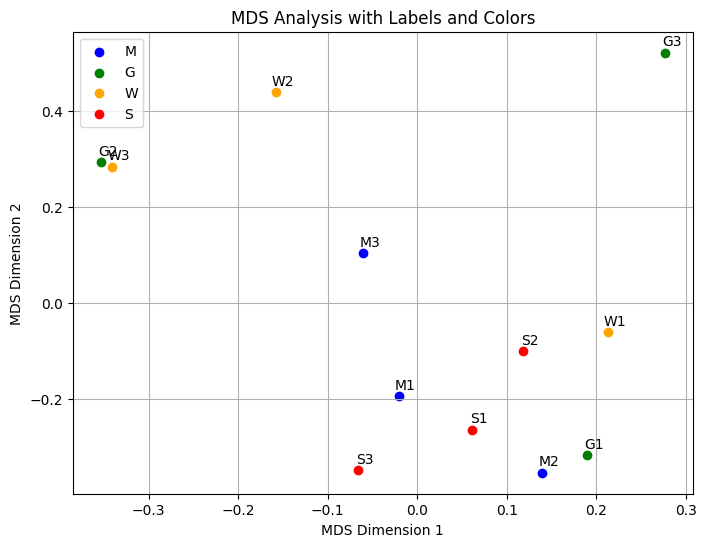

In [ ]:


# Convert dissimilarity matrix to array
dissimilarity_array = dissimilarity_matrix.values

# Performing MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_coordinates = mds.fit_transform(dissimilarity_array)

# Define color mapping
color_mapping = {'M': 'blue', 'G': 'green', 'W': 'orange', 'S': 'red'}

# Plotting MDS result with colors based on categories
plt.figure(figsize=(8, 6))
for category, color in color_mapping.items():
    indices = [i for i, label in enumerate(dissimilarity_matrix.index) if label.startswith(category)]
    plt.scatter(mds_coordinates[indices, 0], mds_coordinates[indices, 1], c=color, marker='o', label=category)

# Adding labels for each point
for i, label in enumerate(dissimilarity_matrix.index):
    plt.annotate(label, (mds_coordinates[i, 0], mds_coordinates[i, 1]), textcoords="offset points", xytext=(5,5), ha='center')

plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('MDS Analysis with Labels and Colors')
plt.grid(True)
plt.legend()  # Add legend to show labels
plt.show()


## Non-Metric MDS:

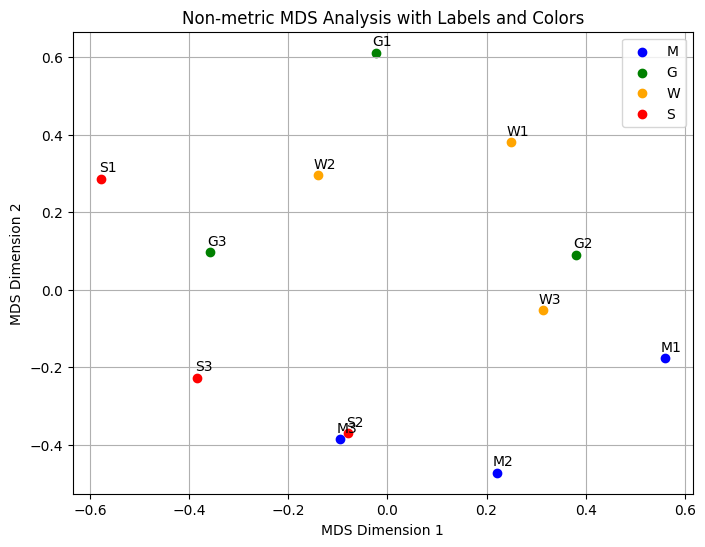

In [ ]:

# Convert dissimilarity matrix to array
dissimilarity_array = dissimilarity_matrix.values

# Performing MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42, metric = False)
mds_coordinates = mds.fit_transform(dissimilarity_array)

# Define color mapping
color_mapping = {'M': 'blue', 'G': 'green', 'W': 'orange', 'S': 'red'}

# Plotting MDS result with colors based on categories
plt.figure(figsize=(8, 6))
for category, color in color_mapping.items():
    indices = [i for i, label in enumerate(dissimilarity_matrix.index) if label.startswith(category)]
    plt.scatter(mds_coordinates[indices, 0], mds_coordinates[indices, 1], c=color, marker='o', label=category)

# Adding labels for each point
for i, label in enumerate(dissimilarity_matrix.index):
    plt.annotate(label, (mds_coordinates[i, 0], mds_coordinates[i, 1]), textcoords="offset points", xytext=(5,5), ha='center')

plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('Non-metric MDS Analysis with Labels and Colors')
plt.grid(True)
plt.legend()  # Add legend to show labels
plt.show()

Finding best number of dimensions:

In [ ]:
# Define a range of dimensions to explore
dimensions_range = range(1, 13)  # Example range of dimensions

# Initialize lists to store stress scores for metric and non-metric MDS
stress_scores_metric = []
stress_scores_nonmetric = []

# Iterate over different dimensions
for n_dimensions in dimensions_range:
    # Perform metric MDS
    mds_metric = MDS(n_components=n_dimensions, dissimilarity='precomputed', random_state=42, metric=True)
    mds_coordinates_metric = mds_metric.fit_transform(dissimilarity_array)

    # Compute stress score for metric MDS
    stress_scores_metric.append(mds_metric.stress_)

    # Perform non-metric MDS
    mds_nonmetric = MDS(n_components=n_dimensions, dissimilarity='precomputed', random_state=42, metric=False)
    mds_coordinates_nonmetric = mds_nonmetric.fit_transform(dissimilarity_array)

    # Compute stress score for non-metric MDS
    stress_scores_nonmetric.append(mds_nonmetric.stress_)

# Find the dimensionality with the lowest stress score for metric MDS
best_dimensionality_metric = dimensions_range[np.argmin(stress_scores_metric)]
best_stress_score_metric = min(stress_scores_metric)

# Find the dimensionality with the lowest stress score for non-metric MDS
best_dimensionality_nonmetric = dimensions_range[np.argmin(stress_scores_nonmetric)]
best_stress_score_nonmetric = min(stress_scores_nonmetric)

print("Metric MDS:")
print("Best number of dimensions:", best_dimensionality_metric)
print("Best stress score:", best_stress_score_metric)

print("Stress Scores for Metric MDS" ,stress_scores_metric)


print("\nNon-Metric MDS:")
print("Best number of dimensions:", best_dimensionality_nonmetric)
print("Best stress score:", best_stress_score_nonmetric)

print("Stress Scores for Metric MDS", stress_scores_nonmetric)

Metric MDS:
Best number of dimensions: 7
Best stress score: 0.7957253113414526
Stress Scores for Metric MDS [1.777777777777778, 0.929554784344659, 0.8158562311792457, 0.8005915930053533, 0.8007267040047941, 0.7988349593098327, 0.7957253113414526, 0.7969516638065657, 0.7975130933437291, 0.7973178140324753, 0.7994459227236999, 0.7989572452476614]

Non-Metric MDS:
Best number of dimensions: 12
Best stress score: 0.08050307614136698
Stress Scores for Metric MDS [4.46477909631433, 1.8093460161622796, 0.5889369988774329, 0.33568613584403373, 0.21858870650091655, 0.18995039016368057, 0.1928656369829751, 0.1490214878873795, 0.1542750389892564, 0.09636487042687082, 0.11492274212452055, 0.08050307614136698]


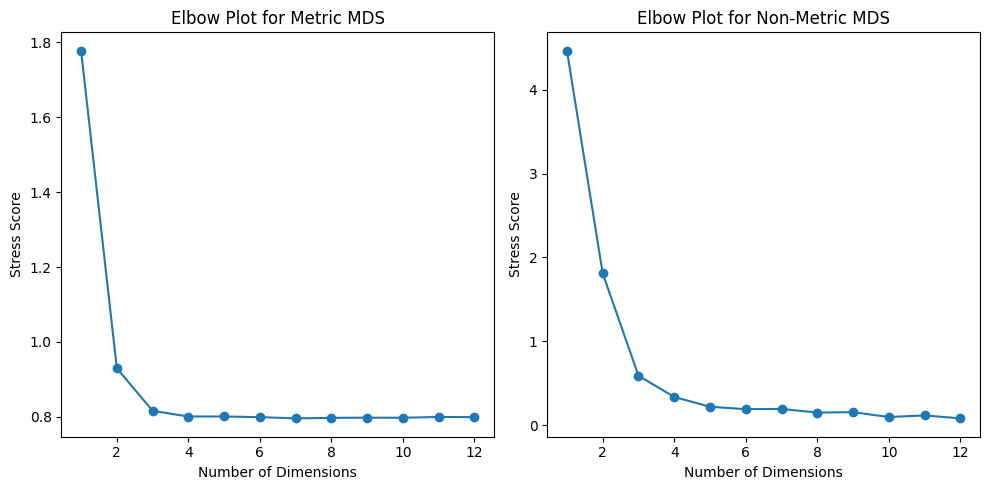

In [ ]:
import matplotlib.pyplot as plt

# Plotting elbow plot for metric MDS
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(dimensions_range, stress_scores_metric, marker='o')
plt.xlabel('Number of Dimensions')
plt.ylabel('Stress Score')
plt.title('Elbow Plot for Metric MDS')

# Plotting elbow plot for non-metric MDS
plt.subplot(1, 2, 2)
plt.plot(dimensions_range, stress_scores_nonmetric, marker='o')
plt.xlabel('Number of Dimensions')
plt.ylabel('Stress Score')
plt.title('Elbow Plot for Non-Metric MDS')

plt.tight_layout()
plt.show()


Metric MDS with 3 components:

In [ ]:


# Convert dissimilarity matrix to array
dissimilarity_array = dissimilarity_matrix.values

# Performing MDS with 3 components
mds = MDS(n_components=3, dissimilarity='precomputed', random_state=42, metric=True)
mds_coordinates = mds.fit_transform(dissimilarity_array)

# Define color mapping
color_mapping = {'M': 'blue', 'G': 'green', 'W': 'orange', 'S': 'red'}

# Define data for scatter plot
data = []
for category, color in color_mapping.items():
    indices = [i for i, label in enumerate(dissimilarity_matrix.index) if label.startswith(category)]
    trace = go.Scatter3d(
        x=mds_coordinates[indices, 0],
        y=mds_coordinates[indices, 1],
        z=mds_coordinates[indices, 2],
        mode='markers',
        marker=dict(color=color, size=5),
        name=category
    )
    data.append(trace)

# Define layout
layout = go.Layout(
    title='Non-metric MDS Analysis with Labels and Colors',
    scene=dict(
        xaxis=dict(title='MDS Dimension 1'),
        yaxis=dict(title='MDS Dimension 2'),
        zaxis=dict(title='MDS Dimension 3')
    ),
    showlegend=True
)

# Create figure and plot
fig = go.Figure(data=data, layout=layout)
fig.show()


Non-Metric MDS with 3 components:

In [ ]:
import plotly.graph_objs as go

# Convert dissimilarity matrix to array
dissimilarity_array = dissimilarity_matrix.values

# Performing MDS with 3 components
mds = MDS(n_components=3, dissimilarity='precomputed', random_state=42, metric=False)
mds_coordinates = mds.fit_transform(dissimilarity_array)

# Define color mapping
color_mapping = {'M': 'blue', 'G': 'green', 'W': 'orange', 'S': 'red'}

# Define data for scatter plot
data = []
for category, color in color_mapping.items():
    indices = [i for i, label in enumerate(dissimilarity_matrix.index) if label.startswith(category)]
    trace = go.Scatter3d(
        x=mds_coordinates[indices, 0],
        y=mds_coordinates[indices, 1],
        z=mds_coordinates[indices, 2],
        mode='markers',
        marker=dict(color=color, size=5),
        name=category
    )
    data.append(trace)

# Define layout
layout = go.Layout(
    title='Non-metric MDS Analysis with Labels and Colors',
    scene=dict(
        xaxis=dict(title='MDS Dimension 1'),
        yaxis=dict(title='MDS Dimension 2'),
        zaxis=dict(title='MDS Dimension 3')
    ),
    showlegend=True
)

# Create figure and plot
fig = go.Figure(data=data, layout=layout)
fig.show()


All subjects:

In [ ]:
file_paths = ["/content/Abhinav Data.xlsx - Sheet1.csv",
              "/content/pragati_data.xlsx - Sheet1.csv",
              "/content/Aman Bhansali Data.xlsx - Sheet1 (1).csv",
              "/content/_Noopur_Data.xlsx - Sheet1.csv",
              "/content/Adarsh_dataset_subject1.xlsx - Sheet1.csv",
              "/content/Nitin_dataset_subject3.xlsx - Sheet1 (1).csv",
              "/content/Palak_dataset_subject2.xlsx - Sheet1 (1).csv",
              "/content/Priya_data.xlsx - Sheet1.csv",
              "/content/Rushil new data.xlsx - Sheet1.csv",
              "/content/Yash Data.xlsx - Sheet1.csv",
              "/content/oshal responses.xlsx - Sheet1 (1).csv",
              "/content/palak_new.xlsx - Sheet1.csv",
              "/content/subject5.xlsx - Sheet1 (1).csv"]

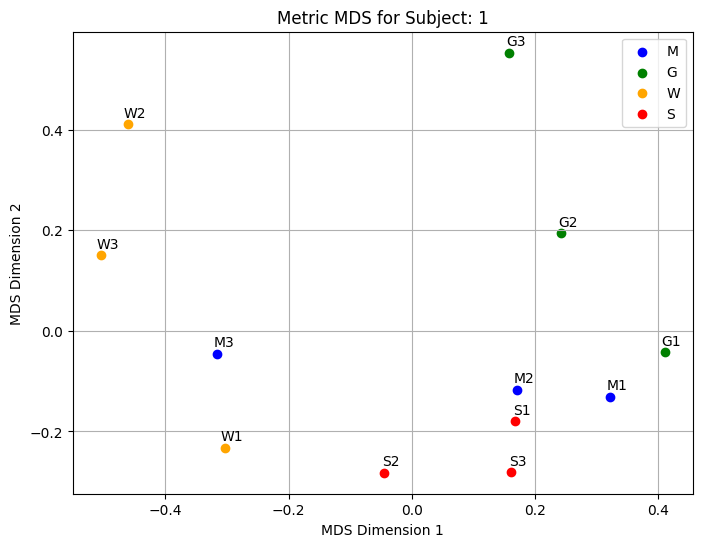

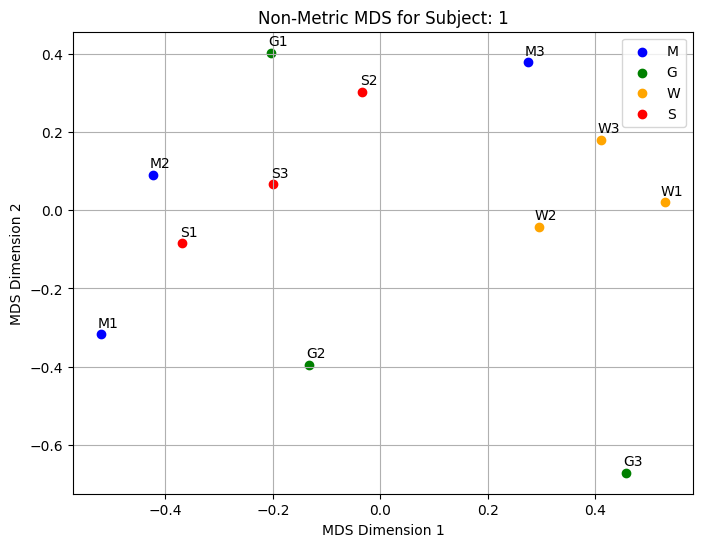

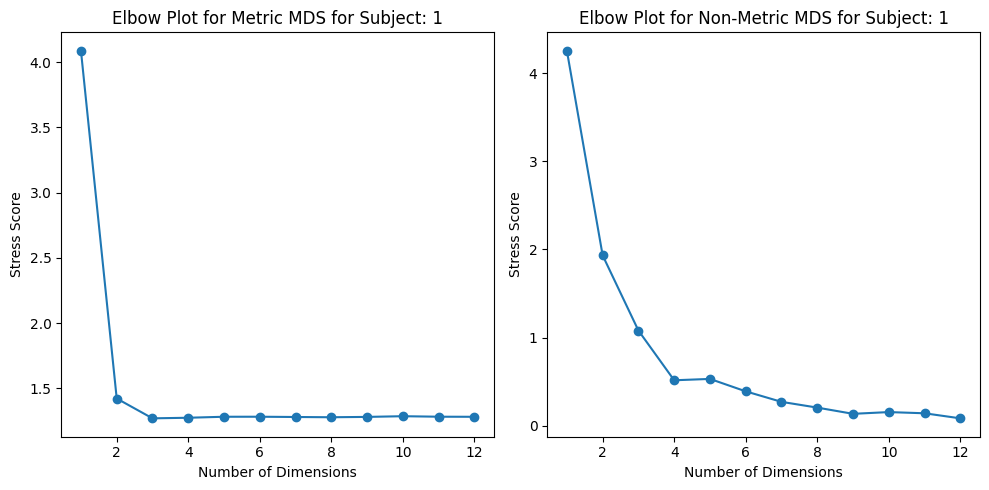

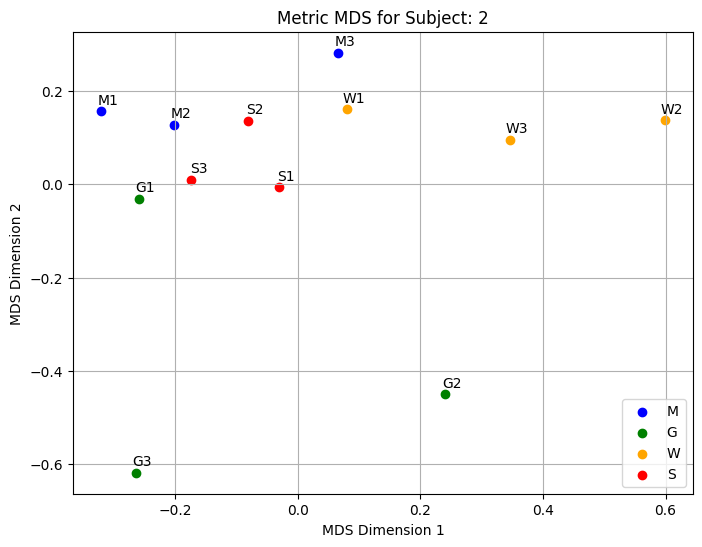

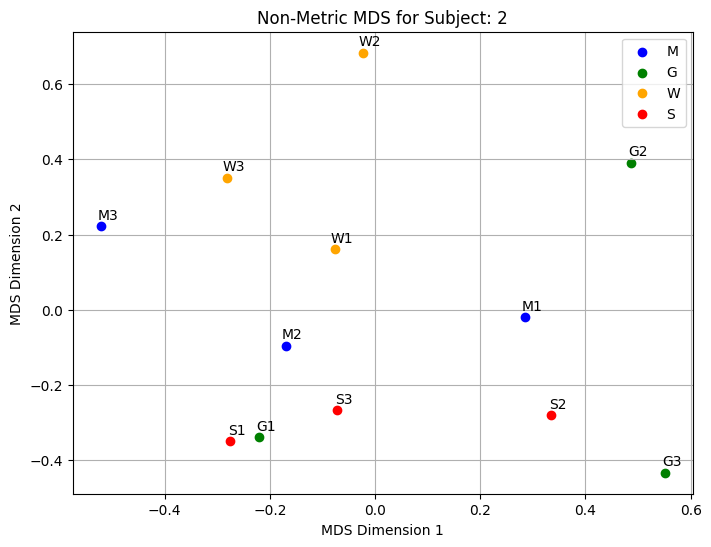

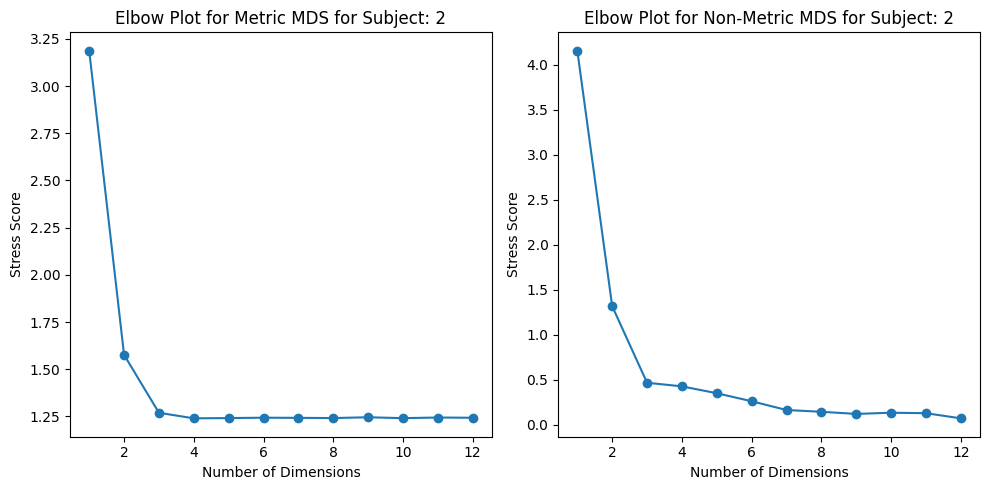

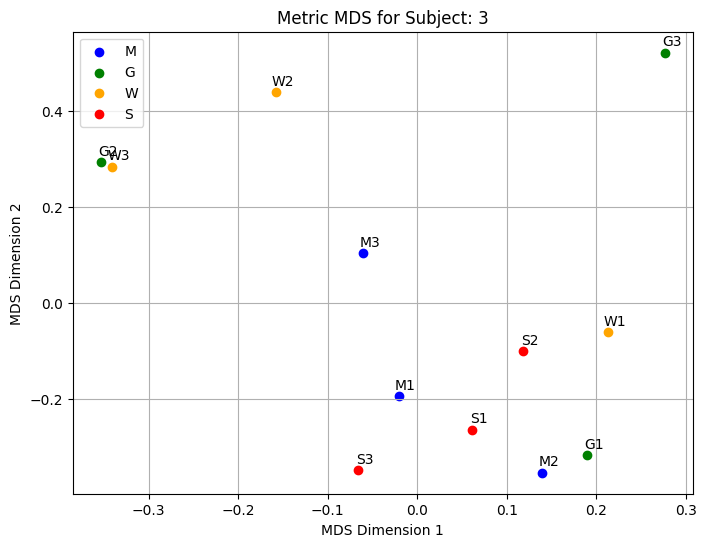

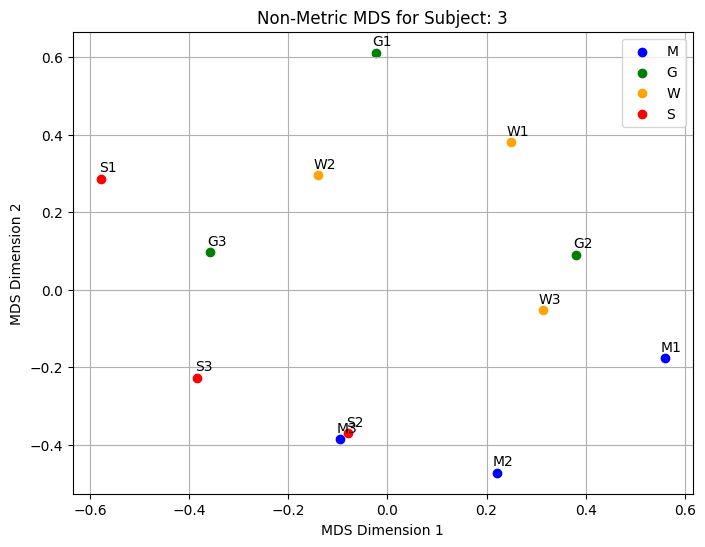

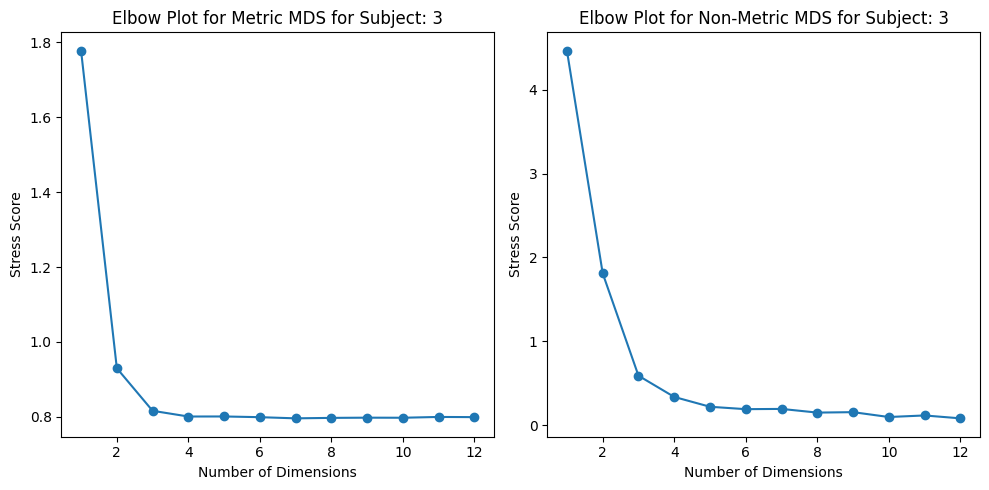

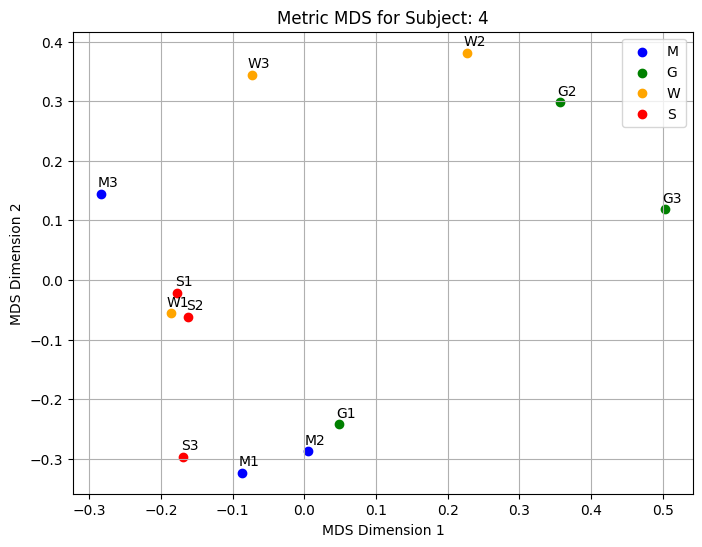

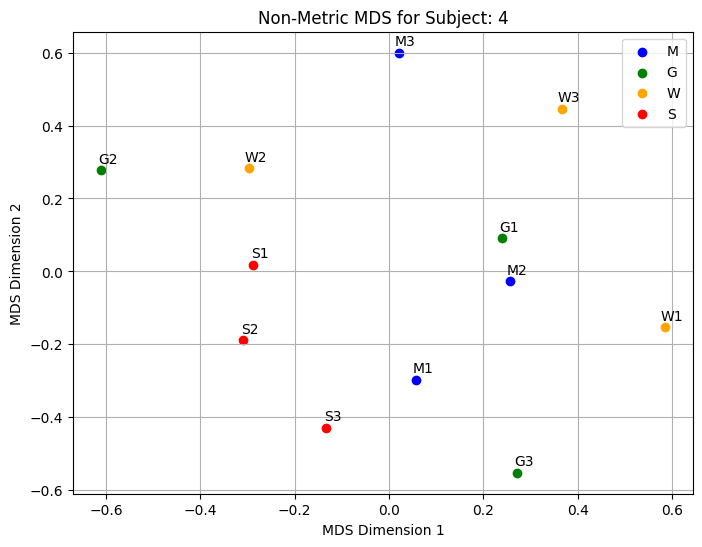

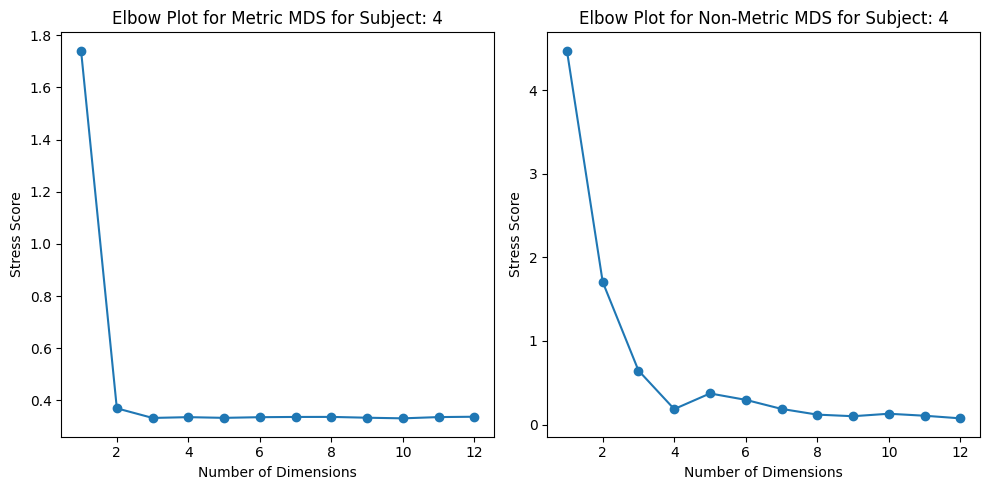

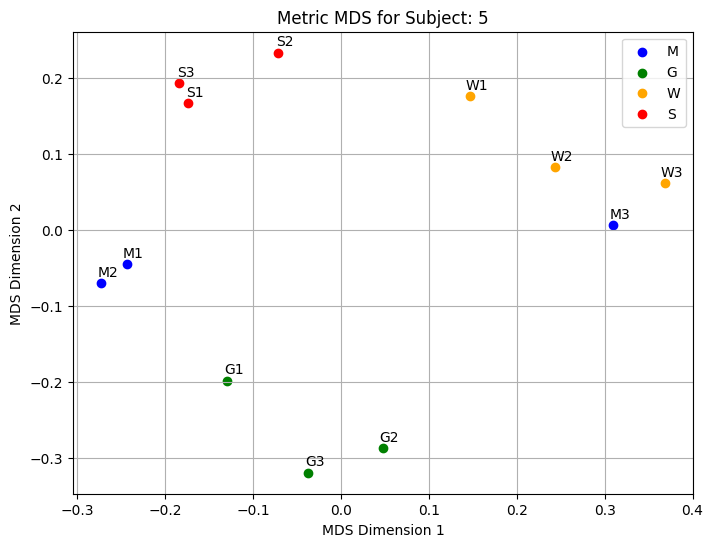

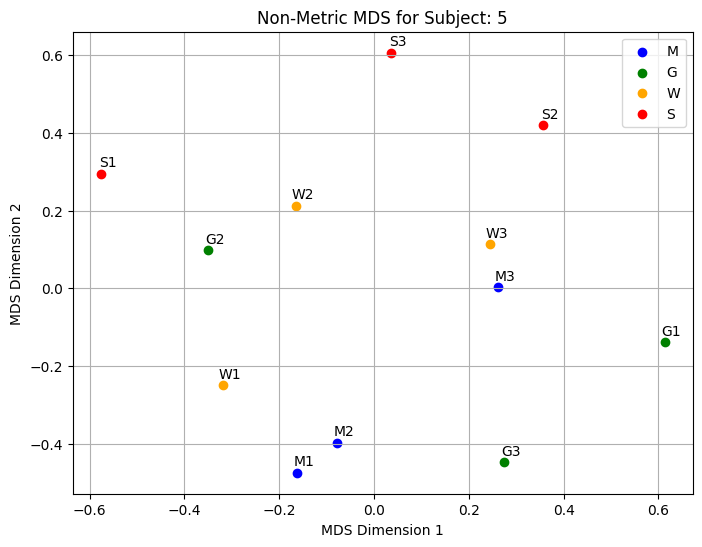

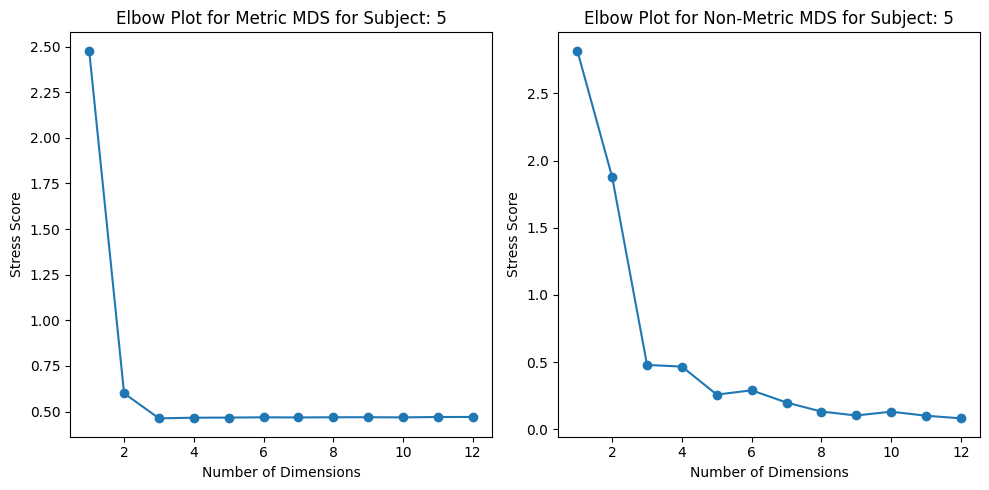

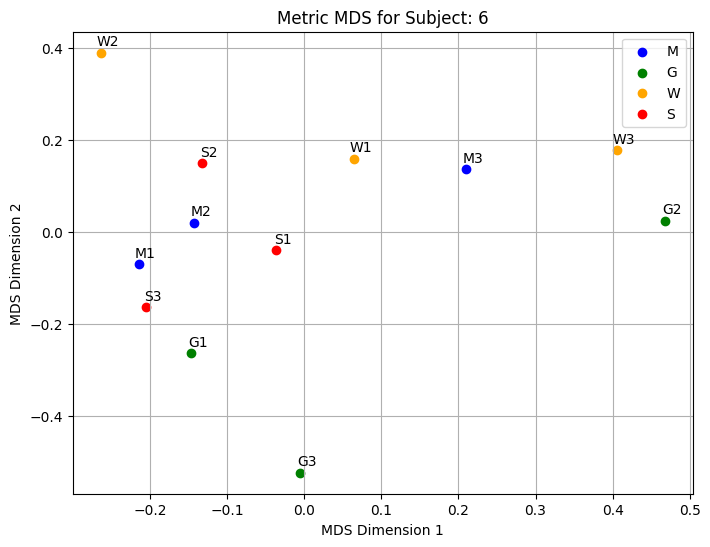

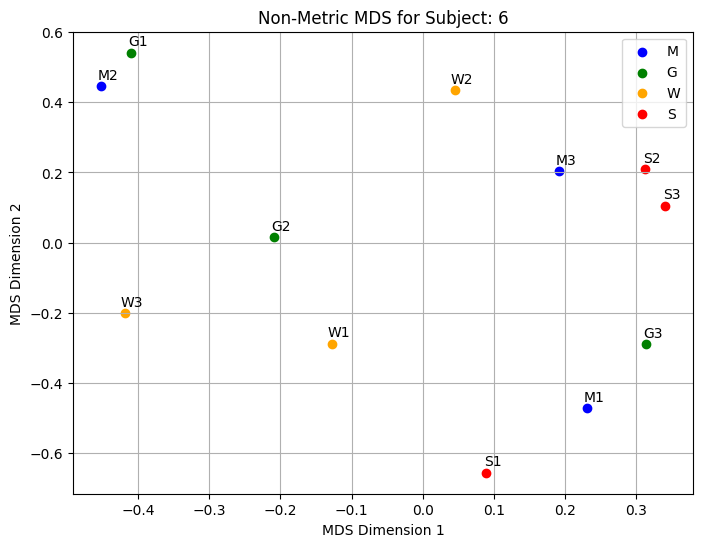

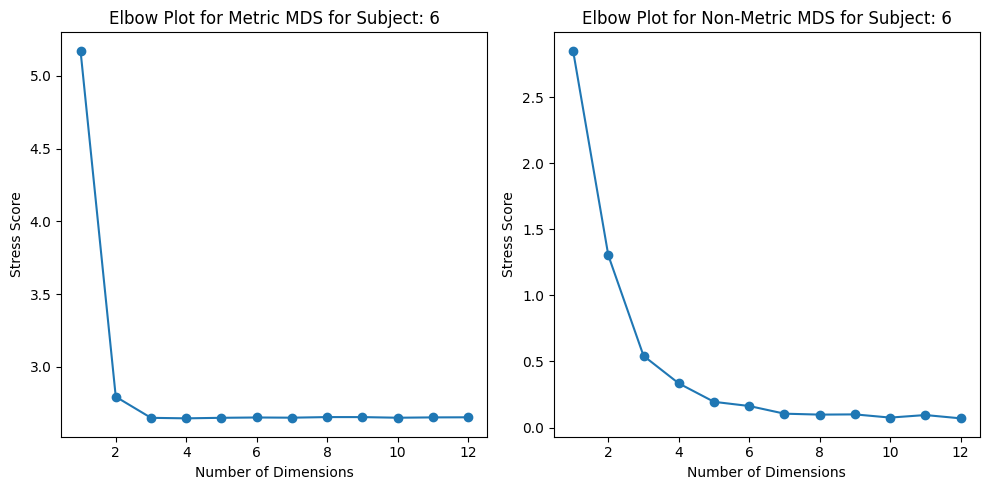

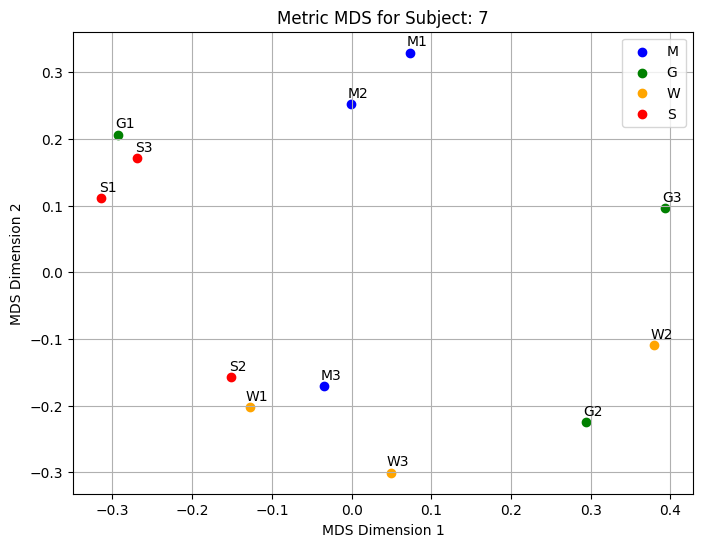

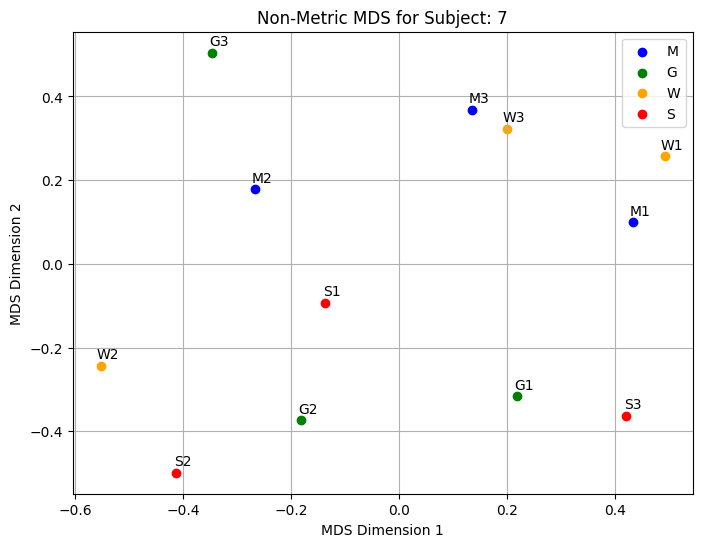

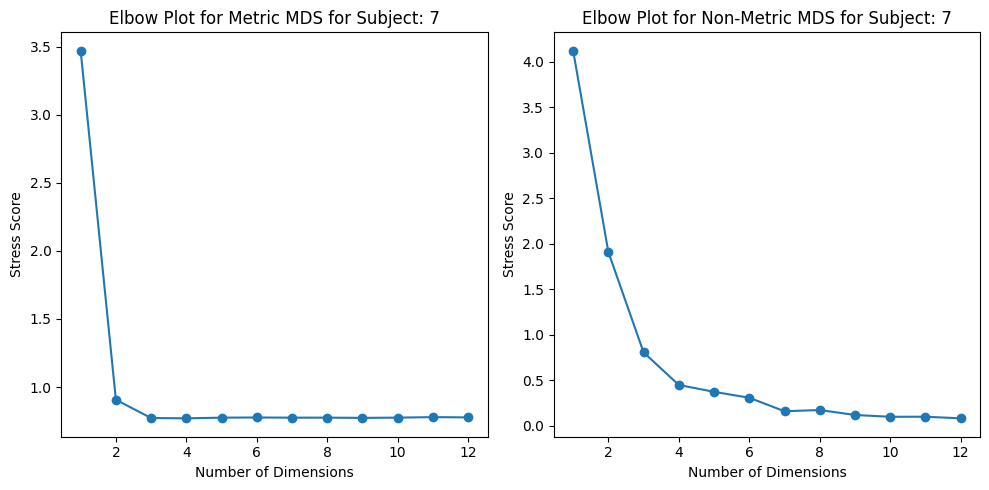

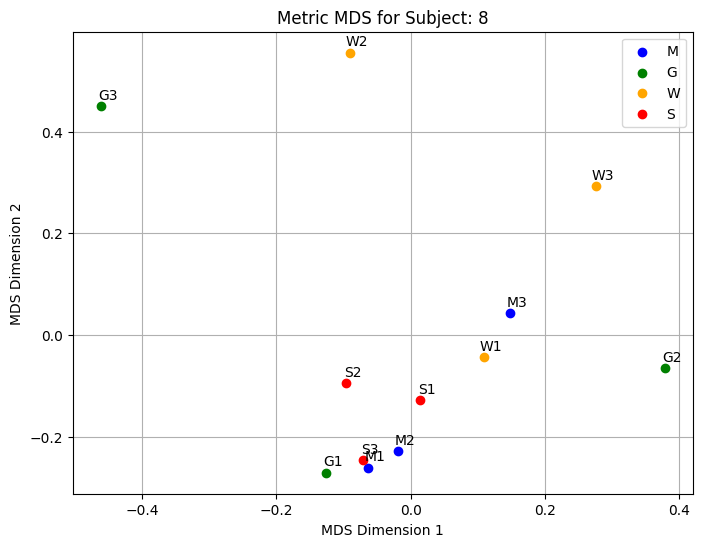

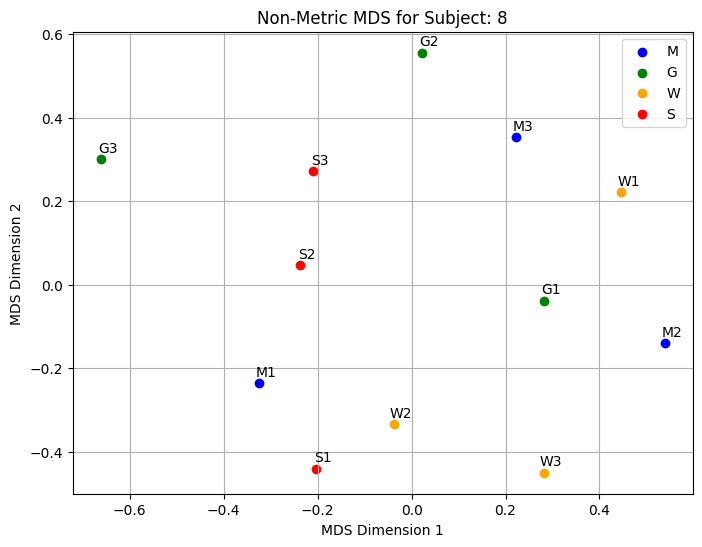

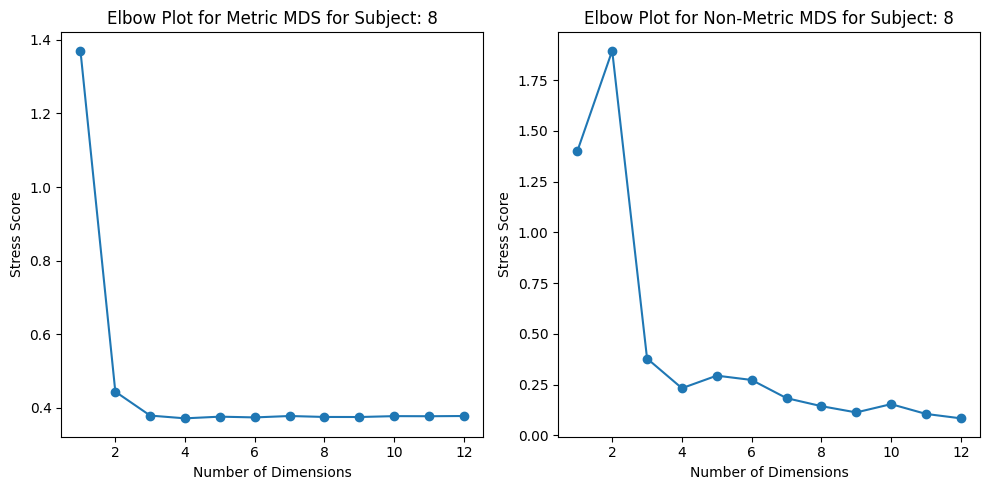

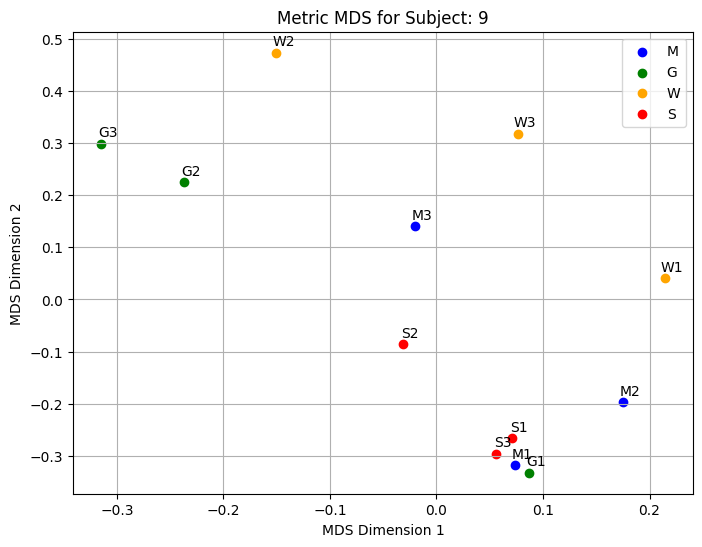

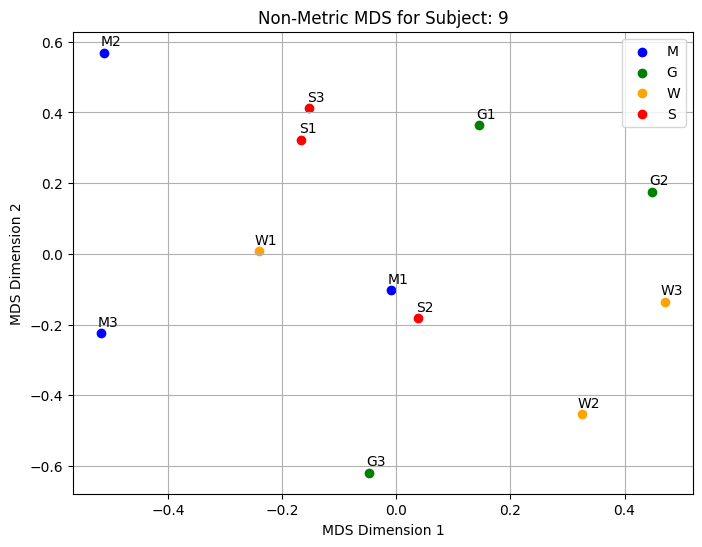

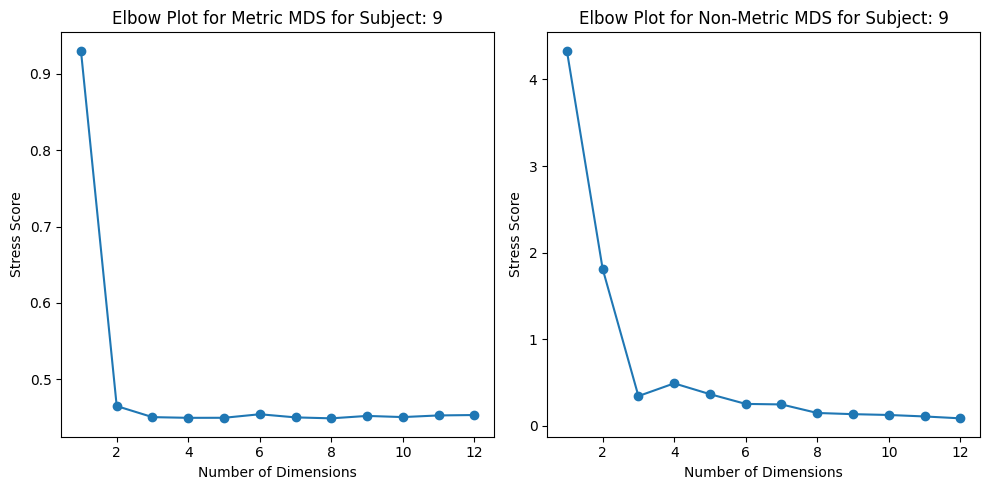

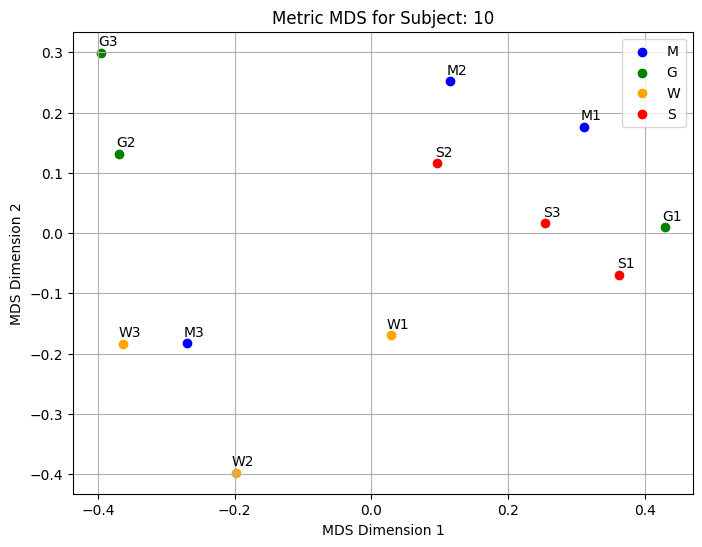

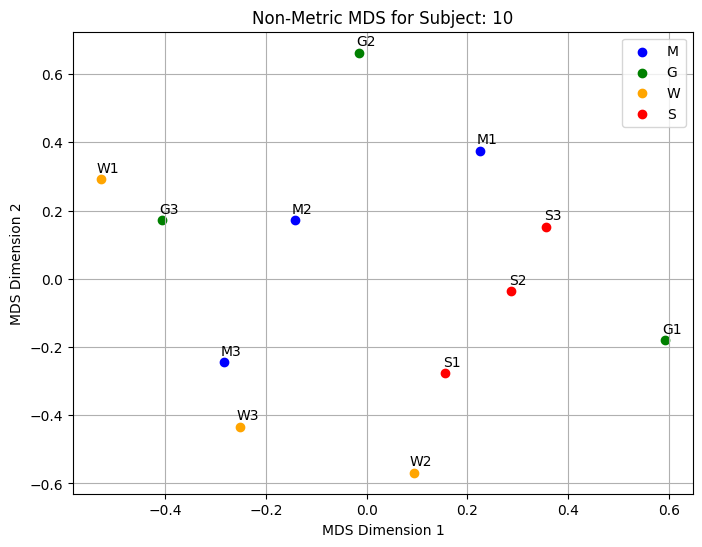

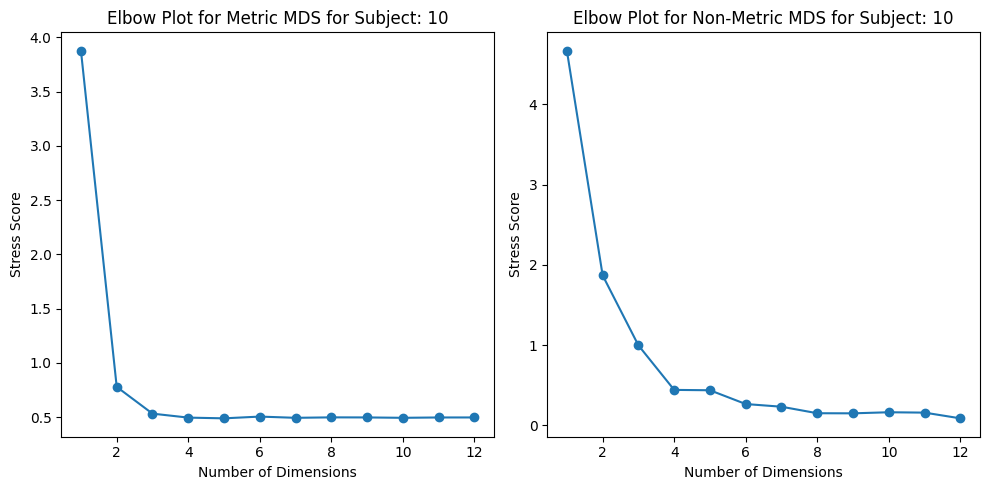

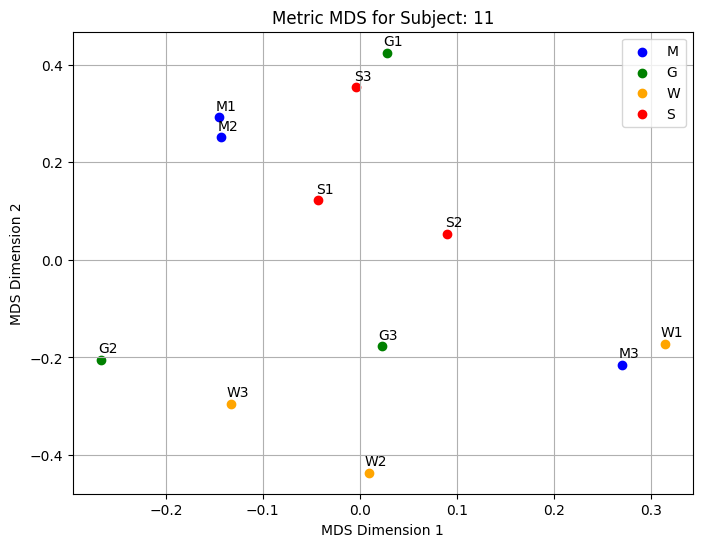

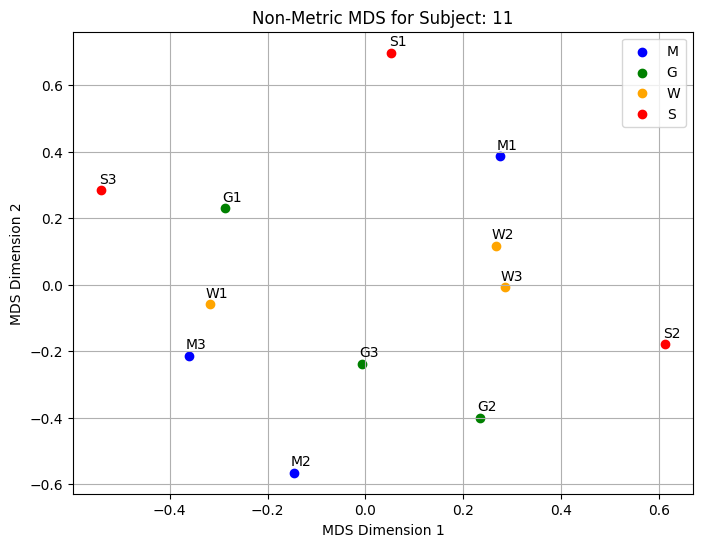

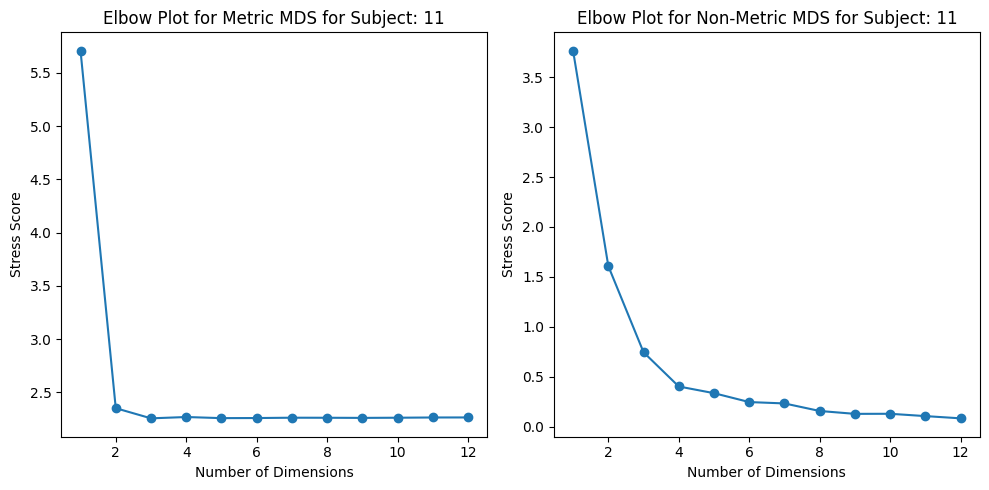

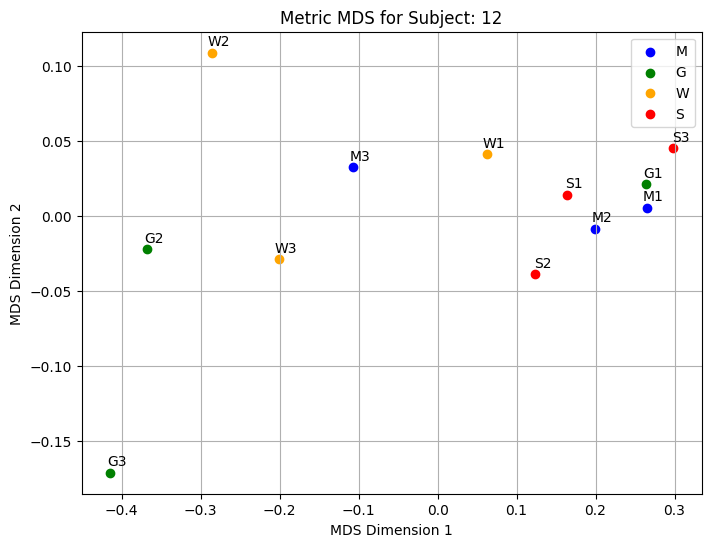

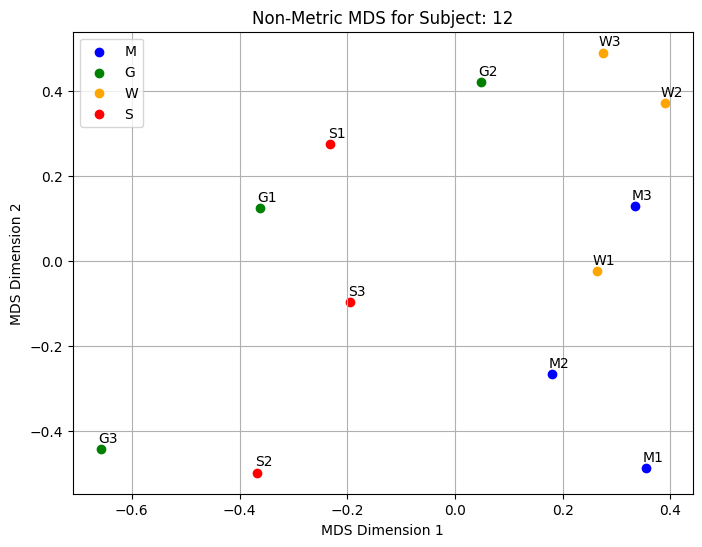

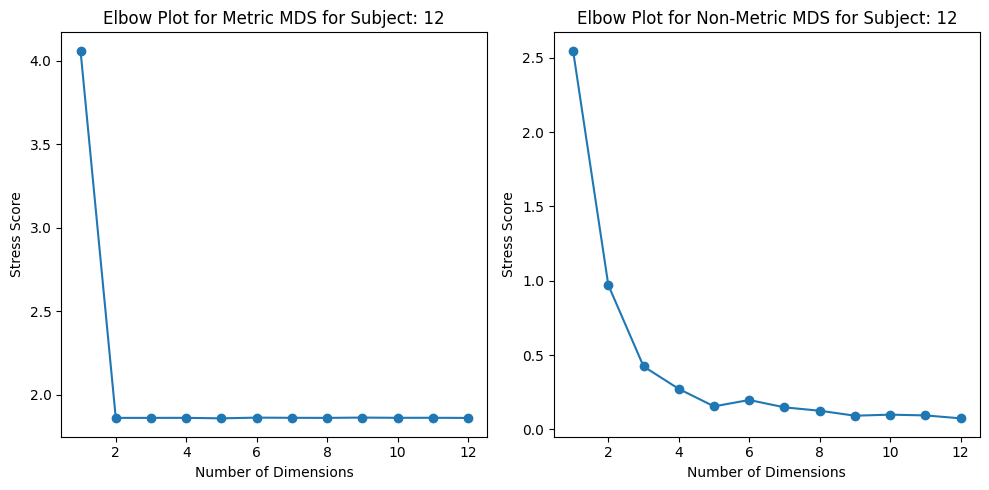

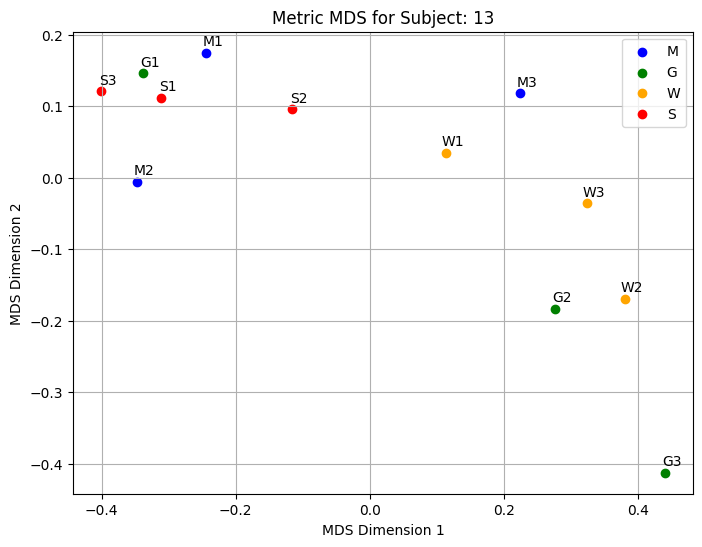

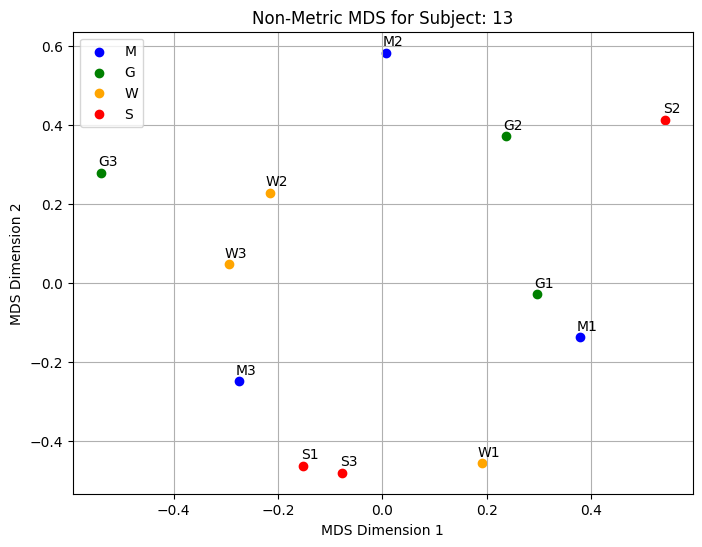

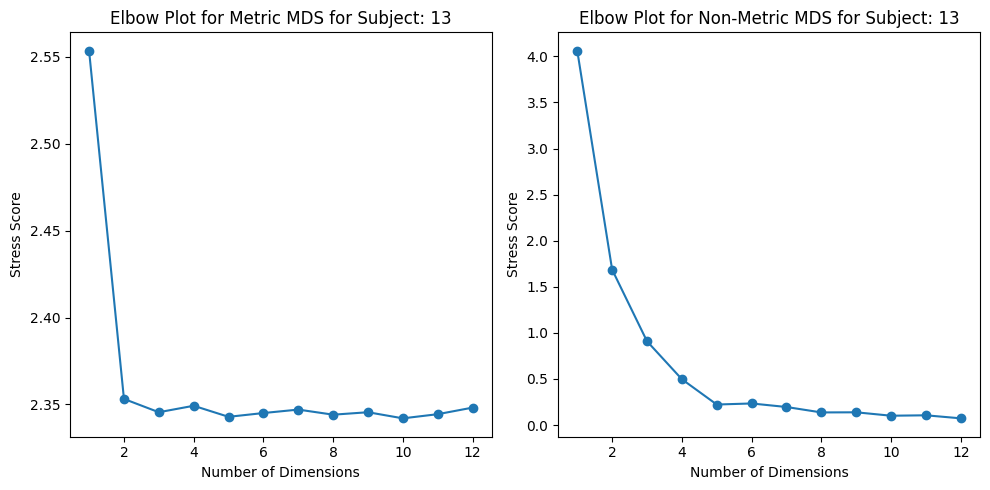

In [ ]:
for subject in range(0, 13):
  df = pd.read_csv(file_paths[subject])

  #df.drop(df.columns[-1], axis=1, inplace=True)

  df[['Material1', 'Material2']] = df['Material'].str.extract(r'\(([^,]+),\s*([^)]+)\)')
  df['SimilarityScores'] = df['SimilarityScores'].astype(int)

  ########################## Dissimilarity matrix ##############################

  materials = pd.concat([df['Material1'], df['Material2']]).unique()
  # Constructing dissimilarity matrix
  dissimilarity_matrix = pd.DataFrame(index=materials, columns=materials)

  for index, row in df.iterrows():
      material1 = row['Material1']
      material2 = row['Material2']
      similarity_score = row['SimilarityScores']

      dissimilarity = 1 - similarity_score / 9.0 # Convert similarity score to dissimilarity

      dissimilarity_matrix.loc[material1, material2] = dissimilarity
      dissimilarity_matrix.loc[material2, material1] = dissimilarity

  # Fill diagonal with zeros
  np.fill_diagonal(dissimilarity_matrix.values, 0)
  # print("Dissimilarity Matrix:")
  # dissimilarity_matrix

  ############################## Metric MDS #############################################

  dissimilarity_array = dissimilarity_matrix.values

  # Performing MDS
  mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
  mds_coordinates = mds.fit_transform(dissimilarity_array)

  color_mapping = {'M': 'blue', 'G': 'green', 'W': 'orange', 'S': 'red'}

  # Plotting MDS result with colors based on categories
  plt.figure(figsize=(8, 6))
  for category, color in color_mapping.items():
      indices = [i for i, label in enumerate(dissimilarity_matrix.index) if label.startswith(category)]
      plt.scatter(mds_coordinates[indices, 0], mds_coordinates[indices, 1], c=color, marker='o', label=category)

  for i, label in enumerate(dissimilarity_matrix.index):
      plt.annotate(label, (mds_coordinates[i, 0], mds_coordinates[i, 1]), textcoords="offset points", xytext=(5,5), ha='center')

  plt.xlabel('MDS Dimension 1')
  plt.ylabel('MDS Dimension 2')
  plt.title(f'Metric MDS for Subject: {subject+1}')
  plt.grid(True)
  plt.legend()  # Add legend to show labels
  plt.show()

  ################################### Non-metric MDS #####################################

  mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42, metric = False)
  mds_coordinates = mds.fit_transform(dissimilarity_array)

  # Plotting MDS result with colors based on categories
  plt.figure(figsize=(8, 6))
  for category, color in color_mapping.items():
      indices = [i for i, label in enumerate(dissimilarity_matrix.index) if label.startswith(category)]
      plt.scatter(mds_coordinates[indices, 0], mds_coordinates[indices, 1], c=color, marker='o', label=category)

  for i, label in enumerate(dissimilarity_matrix.index):
      plt.annotate(label, (mds_coordinates[i, 0], mds_coordinates[i, 1]), textcoords="offset points", xytext=(5,5), ha='center')

  plt.xlabel('MDS Dimension 1')
  plt.ylabel('MDS Dimension 2')
  plt.title(f'Non-Metric MDS for Subject: {subject+1}')
  plt.grid(True)
  plt.legend()  # Add legend to show labels
  plt.show()


  ################################# Elbow Plots for dimensions ##############################

  dimensions_range = range(1, 13)

  stress_scores_metric = []
  stress_scores_nonmetric = []

  # Iterate over different dimensions
  for n_dimensions in dimensions_range:
      # Perform metric MDS
      mds_metric = MDS(n_components=n_dimensions, dissimilarity='precomputed', random_state=42, metric=True)
      mds_coordinates_metric = mds_metric.fit_transform(dissimilarity_array)

      # Compute stress score for metric MDS
      stress_scores_metric.append(mds_metric.stress_)

      # Perform non-metric MDS
      mds_nonmetric = MDS(n_components=n_dimensions, dissimilarity='precomputed', random_state=42, metric=False)
      mds_coordinates_nonmetric = mds_nonmetric.fit_transform(dissimilarity_array)

      # Compute stress score for non-metric MDS
      stress_scores_nonmetric.append(mds_nonmetric.stress_)

  best_dimensionality_metric = dimensions_range[np.argmin(stress_scores_metric)]
  best_stress_score_metric = min(stress_scores_metric)

  best_dimensionality_nonmetric = dimensions_range[np.argmin(stress_scores_nonmetric)]
  best_stress_score_nonmetric = min(stress_scores_nonmetric)

  # Plotting elbow plot for metric MDS
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.plot(dimensions_range, stress_scores_metric, marker='o')
  plt.xlabel('Number of Dimensions')
  plt.ylabel('Stress Score')
  plt.title(f'Elbow Plot for Metric MDS for Subject: {subject+1}')

  # Plotting elbow plot for non-metric MDS
  plt.subplot(1, 2, 2)
  plt.plot(dimensions_range, stress_scores_nonmetric, marker='o')
  plt.xlabel('Number of Dimensions')
  plt.ylabel('Stress Score')
  plt.title(f'Elbow Plot for Non-Metric MDS for Subject: {subject+1}')

  plt.tight_layout()
  plt.show()



  #################################### Metric with 3 components#####################

  mds = MDS(n_components=3, dissimilarity='precomputed', random_state=42, metric=True)
  mds_coordinates = mds.fit_transform(dissimilarity_array)

  color_mapping = {'M': 'blue', 'G': 'green', 'W': 'orange', 'S': 'red'}
  # Define data for scatter plot
  data = []
  for category, color in color_mapping.items():
      indices = [i for i, label in enumerate(dissimilarity_matrix.index) if label.startswith(category)]
      trace = go.Scatter3d(
          x=mds_coordinates[indices, 0],
          y=mds_coordinates[indices, 1],
          z=mds_coordinates[indices, 2],
          mode='markers',
          marker=dict(color=color, size=5),
          name=category
      )
      data.append(trace)

  layout = go.Layout(
      title='Non-metric MDS - 3 components',
      scene=dict(
          xaxis=dict(title='MDS Dimension 1'),
          yaxis=dict(title='MDS Dimension 2'),
          zaxis=dict(title='MDS Dimension 3')
      ),
      showlegend=True
  )
  fig = go.Figure(data=data, layout=layout)
  fig.show()


  ############################## Non- Metric with 3 components #####################

  # Performing MDS with 3 components
  mds = MDS(n_components=3, dissimilarity='precomputed', random_state=42, metric=True)
  mds_coordinates = mds.fit_transform(dissimilarity_array)

  data = []
  for category, color in color_mapping.items():
      indices = [i for i, label in enumerate(dissimilarity_matrix.index) if label.startswith(category)]
      trace = go.Scatter3d(
          x=mds_coordinates[indices, 0],
          y=mds_coordinates[indices, 1],
          z=mds_coordinates[indices, 2],
          mode='markers',
          marker=dict(color=color, size=5),
          name=category
      )
      data.append(trace)

  layout = go.Layout(
      title='Non-metric MDS - 3 components',
      scene=dict(
          xaxis=dict(title='MDS Dimension 1'),
          yaxis=dict(title='MDS Dimension 2'),
          zaxis=dict(title='MDS Dimension 3')
      ),
      showlegend=True
  )
  fig = go.Figure(data=data, layout=layout)
  fig.show()

In [ ]:
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Define a range of n_components to explore
n_components_range = range(1, 9)

# Perform MDS for each value of n_components
mds_coordinates = {}
for n_components in n_components_range:
    mds = MDS(n_components=n_components, dissimilarity='precomputed', random_state=42)
    mds_coordinates[n_components] = mds.fit_transform(dissimilarity_array)

# Cluster the data and evaluate clustering performance for each value of n_components
best_score = -np.inf
best_n_components = None
best_n_clusters = None

for n_components in n_components_range:
    for n_clusters in range(2, 6):  # Example range of n_clusters for k-means
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(mds_coordinates[n_components])
        score = silhouette_score(mds_coordinates[n_components], labels)
        if score > best_score:
            best_score = score
            best_n_components = n_components
            best_n_clusters = n_clusters

        print("Current number of components:", n_components)
        print("Current number of clusters:", n_clusters)
        print("Current silhouette score:", score)
        print("---------------------------------------------------")

print("Best number of components:", best_n_components)
print("Best number of clusters:", best_n_clusters)
print("Best silhouette score:", best_score)



Current number of components: 1
Current number of clusters: 2
Current silhouette score: 0.7097953814055425
---------------------------------------------------
Current number of components: 1
Current number of clusters: 3
Current silhouette score: 0.5756989819886291
---------------------------------------------------
Current number of components: 1
Current number of clusters: 4
Current silhouette score: 0.6066039793202701
---------------------------------------------------
Current number of components: 1
Current number of clusters: 5
Current silhouette score: 0.5324286094022938
---------------------------------------------------
Current number of components: 2
Current number of clusters: 2
Current silhouette score: 0.6422158706215401
---------------------------------------------------
Current number of components: 2
Current number of clusters: 3
Current silhouette score: 0.5328648673741971
---------------------------------------------------
Current number of components: 2
Current number